<a href="https://colab.research.google.com/github/customnime/WhisperX_colab/blob/main/WhisperTubeX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

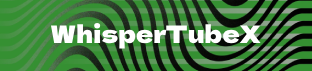

**WhisperTubeX.** *Crea subtítulos de forma automatica y precisa con WhisperX!*

Hola! si estas aqui, es porque ya has visto mi otro notebook de colab sobre WhisperX. Este notebook esta especializado en videos de youtube, nunca antes habia sido tan facil crear subitutlos para youtube!

## ¿Cómo empezar? 🚀

1. **Habilita la GPU**: Para obtener una transcripción rápida, asegúrate de habilitar la GPU. Ve a "Entorno de ejecución" > "Cambiar tipo de entorno de ejecución" > y selecciona "T4 GPU" en la opción "Acelerador de hardware".
2. **Sube tu archivo de audio**: Usa la herramienta de abajo para subir tu archivo de audio.
3. **Ejecuta las celdas**: Simplemente ejecuta las celdas en orden, ¡y verás la magia suceder!

**Nota**: Si eres nuevo en Google Colab, cada celda con código se ejecuta haciendo clic en el botón de reproducción (▶️) a la izquierda de la celda, o puedes presionar `Shift + Enter`.


## Transcripcion con videos de youtube 🎞️

In [1]:
#@markdown ## 1. Instalacion para usar videos de youtube. 🔑

%%capture
!pip install virtualenv
!virtualenv whisper-env
!source whisper-env/bin/activate
!whisper-env/bin/pip install git+https://github.com/m-bain/whisperx.git@v2.0.1

!pip uninstall torchaudio -y
!pip install torchaudio==0.13.1
!pip install torch==1.13.1 --index-url https://download.pytorch.org/whl/cu117

!pip install yt_dlp
!pip install ffmpeg
!mkdir youtubeaudio

In [ ]:
#@markdown ## 2. Descarga el audio de su video de youtube 📀
from __future__ import unicode_literals
import yt_dlp
import ffmpeg
import sys

ydl_opts = {
    'format': 'bestaudio/best',
#    'outtmpl': 'output.%(ext)s',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',
    }],
    "outtmpl": 'audio',  # this is where you can edit how you'd like the filenames to be formatted
}
def download_from_url(url):
    ydl.download([url])
    # stream = ffmpeg.input('output.m4a')
    # stream = ffmpeg.output(stream, 'output.wav')


with yt_dlp.YoutubeDL(ydl_opts) as ydl:
      url = "https://www.youtube.com/watch?v=vM34iKSsW0Y" #@param {type:"string"}
      download_from_url(url)





[youtube] Extracting URL: https://www.youtube.com/watch?v=vM34iKSsW0Y
[youtube] vM34iKSsW0Y: Downloading webpage
[youtube] vM34iKSsW0Y: Downloading ios player API JSON
[youtube] vM34iKSsW0Y: Downloading android player API JSON
[youtube] vM34iKSsW0Y: Downloading m3u8 information
[info] vM34iKSsW0Y: Downloading 1 format(s): 251
[download] Destination: audio
[download] 100% of    1.68MiB in 00:00:00 at 7.93MiB/s   


In [ ]:
#@markdown ## 3. Transcripción de su video (subtítulos) 📄
#@markdown Ahora, vamos a transcribir tu archivo de audio, para hacerlo, ejecute esta celda
!whisper-env/bin/whisperx audio.mp3 --language id --model large-v2 --vad_filter True --output_format srt --align_model WAV2VEC2_ASR_LARGE_LV60K_960H

In [ ]:
#@markdown  ## 4. Descarga el archivo ".srt" para su video de youtube! 📂
#@markdown Haz click a la celda para descargar los resultados que has creado

from google.colab import files
files.download ("audio.srt")

## Transcripcion en otro idioma. 🌍
Puedes hacer una transcripcion de tu audio y transformarlo en otro idioma. Tienes mas de 20 idiomas para traducir.

In [ ]:
!whisperx audio.mp3 --model large-v2 --task transcribe --language en --output_dir . --align_model WAV2VEC2_ASR_LARGE_LV60K_960H --device cuda

## **Lenguajes disponibles para traducir.** 🗨️
Puedes modificar el codigo y traducir al idioma que mas te guste. Para hacerlo, modifica las dos letras que estan justo a lado de "language" y coloque algunos de estos idiomas, (recuerda, coloca solamente las dos letras):



```
af - Afrikaans
am - Amharic
ar - Arabic
as - Assamese
az - Azerbaijani
ba - Bashkir
be - Belarusian
bg - Bulgarian
bn - Bengali
bo - Tibetan
br - Breton
bs - Bosnian
ca - Catalan
cs - Czech
cy - Welsh
da - Danish
de - German
el - Greek
en - English
es - Spanish
et - Estonian
eu - Basque
fa - Persian
fi - Finnish
fo - Faroese
fr - French
gl - Galician
gu - Gujarati
ha - Hausa
haw - Hawaiian
he - Hebrew
hi - Hindi
hr - Croatian
ht - Haitian Creole
hu - Hungarian
hy - Armenian
id - Indonesian
is - Icelandic
it - Italian
ja - Japanese
jw - Javanese
ka - Georgian
kk - Kazakh
km - Khmer
kn - Kannada
ko - Korean
la - Latin
lb - Letzeburgesch
ln - Lingala
lo - Lao
lt - Lithuanian
lv - Latvian
mg - Malagasy
mi - Maori
mk - Macedonian
ml - Malayalam
mn - Mongolian
mr - Marathi
ms - Malay
mt - Maltese
my - Burmese
ne - Nepali
nl - Dutch
nn - Norwegian Nynorsk
no - Norwegian
oc - Occitan
pa - Panjabi
pl - Polish
ps - Pashto
pt - Portuguese
ro - Romanian
ru - Russian
sa - Sanskrit
sd - Sindhi
si - Sinhala
sk - Slovak
sl - Slovenian
sn - Shona
so - Somali
sq - Albanian
sr - Serbian
su - Sundanese
sv - Swedish
sw - Swahili
ta - Tamil
te - Telugu
tg - Tajik
th - Thai
tk - Turkmen
tl - Tagalog
tr - Turkish
tt - Tatar
uk - Ukrainian
ur - Urdu
uz - Uzbek
vi - Vietnamese
yi - Yiddish
yo - Yoruba
zh - Chinese
```



## **Créditos y Agradecimientos** 🎉

Este notebook utiliza **WhisperX**, una increíble herramienta de transcripción de voz. ¡Muchas gracias al equipo detrás de WhisperX por hacer posible esta tecnología! **¡No dudes en explorar el [repositorio de WhisperX](https://github.com/m-bain/whisperX) para aprender más sobre este emocionante proyecto!**

Este notebook tiene el codigo de otro notebook de colab, muchas gracias por su trabajo! [repositorio de WhisperX-Youtube-SRT
](https://github.com/ardha27/WhisperX-Youtube-SRT)